In [68]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 27 01:12:05 2020

@author: ramkeerthyathinarayanan
"""

import pandas as pd
from datetime import datetime
import numpy as np

In [48]:
print(datetime.now())

2020-04-07 19:52:22.357098


In [49]:
similarity_score = 0.95
final_dataframe = pd.DataFrame(columns=['userId','recommendedMovie','rank'])
final_dataframe_tags = pd.DataFrame(columns=['userId','recommendedMovie','timeRank','tagRank'])

In [50]:
def ListDiff(li1, li2):
    return (list(set(li1) - set(li2)))

In [51]:
def timeAverage(batch_data):
    hour = 0
    minute = 0
    second = 0
    for index, user_row in batch_data.iterrows():
        split_string = user_row.datetime_timestamp.split(':')
        hour = hour + int(split_string[0])
        minute = minute + int(split_string[1])
        second = second + int(split_string[2])
    average_time = str(round(hour / len(batch_data))) + ':' + str(round(minute / len(batch_data))) + ':' + str(round(second / len(batch_data)))
    return average_time

In [52]:
def timeInSeconds(time):
    split_string = time.split(':')
    hour = int(split_string[0])
    minute = int(split_string[1])
    second = int(split_string[2])
    return (hour * 3600) + (minute * 60) + second

In [53]:
def getMovieIdForMovie(movie_name, data):
    movie_detail = data.loc[data['title'] == movie_name]
    return movie_detail['movieId']

In [87]:
def getMovieNameForMovieId(movie_id, data):
    movie_detail = data.loc[data['movieId'] == movie_id]
    return movie_detail['title']

In [54]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [55]:
movies = pd.read_csv("ml-latest-small/movies.csv")

movies = movies.loc[:,["movieId","title","genres"]]

ratings = pd.read_csv("ml-latest-small/ratings.csv")

ratings = ratings.loc[:,["userId","movieId","rating","timestamp"]]

datetime_timestamp = []

for index, rating in ratings.iterrows():
    datetime_timestamp.append(datetime.utcfromtimestamp(int(rating['timestamp'])).strftime('%H:%M:%S'))
    
ratings['datetime_timestamp'] = datetime_timestamp

data = pd.merge(movies,ratings)

data.shape

pivot_table = data.pivot_table(index = ["title"],columns = ["userId"],values = "rating")
pivot_table.head(10)

total_users = len(pivot_table.columns)

In [57]:
pivot_table

userId                                              1    2    3    4    5    \
title                                                                         
'71 (2014)                                          NaN  NaN  NaN  NaN  NaN   
'Hellboy': The Seeds of Creation (2004)             NaN  NaN  NaN  NaN  NaN   
'Round Midnight (1986)                              NaN  NaN  NaN  NaN  NaN   
'Salem's Lot (2004)                                 NaN  NaN  NaN  NaN  NaN   
'Til There Was You (1997)                           NaN  NaN  NaN  NaN  NaN   
'Tis the Season for Love (2015)                     NaN  NaN  NaN  NaN  NaN   
'burbs, The (1989)                                  NaN  NaN  NaN  NaN  NaN   
'night Mother (1986)                                NaN  NaN  NaN  NaN  NaN   
(500) Days of Summer (2009)                         NaN  NaN  NaN  NaN  NaN   
*batteries not included (1987)                      NaN  NaN  NaN  NaN  NaN   
...All the Marbles (1981)                           NaN  NaN  NaN  NaN  NaN   
...And Justice for All (1979)                       NaN  NaN  NaN  NaN  NaN   
00 Schneider - Jagd auf Nihil Baxter (1994)         NaN  NaN  NaN  NaN  NaN   
1-900 (06) (1994)                                   NaN  NaN  NaN  NaN  NaN   
10 (1979)                                           NaN  NaN  NaN  NaN  NaN   
10 Cent Pistol (2015)                               NaN  NaN  NaN  NaN  NaN   
10 Cloverfield Lane (2016)                          NaN  NaN  NaN  NaN  NaN   
10 Items or Less (2006)                             NaN  NaN  NaN  NaN  NaN   
10 Things I Hate About You (1999)                   NaN  NaN  NaN  NaN  NaN   
10 Years (2011)                                     NaN  NaN  NaN  NaN  NaN   
10,000 BC (2008)                                    NaN  NaN  NaN  NaN  NaN   
100 Girls (2000)                                    NaN  NaN  NaN  NaN  NaN   
100 Streets (2016)                                  NaN  NaN  NaN  NaN  NaN   
101 Dalmatians (1996)                               NaN  NaN  NaN  NaN  NaN   
101 Dalmatians (One Hundred and One Dalmatians)...  NaN  NaN  NaN  NaN  NaN   
101 Dalmatians II: Patch's London Adventure (2003)  NaN  NaN  NaN  NaN  NaN   
101 Reykjavik (101 Reykjavík) (2000)                NaN  NaN  NaN  NaN  NaN   
102 Dalmatians (2000)                               NaN  NaN  NaN  NaN  NaN   
10th & Wolf (2006)                                  NaN  NaN  NaN  NaN  NaN   
10th Kingdom, The (2000)                            NaN  NaN  NaN  NaN  NaN   
...                                                 ...  ...  ...  ...  ...   
Zero Dark Thirty (2012)                             NaN  NaN  NaN  NaN  NaN   
Zero Effect (1998)                                  NaN  NaN  NaN  NaN  NaN   
Zero Theorem, The (2013)                            NaN  NaN  NaN  NaN  NaN   
Zero de conduite (Zero for Conduct) (Zéro de co...  NaN  NaN  NaN  NaN  NaN   
Zeus and Roxanne (1997)                             NaN  NaN  NaN  NaN  NaN   
Zipper (2015)                                       NaN  NaN  NaN  NaN  NaN   
Zodiac (2007)                                       NaN  NaN  NaN  NaN  NaN   
Zombeavers (2014)                                   NaN  NaN  NaN  NaN  NaN   
Zombie (a.k.a. Zombie 2: The Dead Are Among Us)...  NaN  NaN  NaN  NaN  NaN   
Zombie Strippers! (2008)                            NaN  NaN  NaN  NaN  NaN   
Zombieland (2009)                                   NaN  3.0  NaN  NaN  NaN   
Zone 39 (1997)                                      NaN  NaN  NaN  NaN  NaN   
Zone, The (La Zona) (2007)                          NaN  NaN  NaN  NaN  NaN   
Zookeeper (2011)                                    NaN  NaN  NaN  NaN  NaN   
Zoolander (2001)                                    NaN  NaN  NaN  NaN  NaN   
Zoolander 2 (2016)                                  NaN  NaN  NaN  NaN  NaN   
Zoom (2006)                                         NaN  NaN  NaN  NaN  NaN   
Zoom (2015)                                       

In [12]:
print(datetime.now())

2020-04-03 01:06:02.396417


In [13]:
for index in range(total_users):
    
    user_id = index + 1
    print('Processing user ', user_id)

    user = pivot_table[user_id]
    user_movies = []
    
    # Append liked movies by the particular user taken into consideration
    for movie_rating in user.iteritems():
        if(movie_rating[1] >= 3):
            user_movies.append(movie_rating[0])
    
    # Finding similar users for the user taken into consideration and sorting them in descending order
    similarity_with_other_users = pivot_table.corrwith(user)
    similarity_with_other_users = similarity_with_other_users.sort_values(ascending=False)
    
    # Append all the movies from the similar users which has ratings greater than or equal to 3
    # At the same time the movies should not be present in the user list
    recommended_movie = []
        
    for similarity in similarity_with_other_users.iteritems():
        if(similarity[1] > similarity_score and similarity[1] < 1.0):
            similar_user = pivot_table[similarity[0]]
            
            for movie_rating in similar_user.iteritems():
                if(movie_rating[1] >= 3 and movie_rating[0] not in recommended_movie):
                    if(movie_rating[0] not in user_movies):
                        recommended_movie.append(movie_rating[0])
    
    # Finding time average of the user     
    user_data = data.loc[data['userId'] == user_id]
    user_time_average = timeAverage(user_data)
    
    # Finding time average for each and every recommended movie
    recommended_movie_dict = {}
    
    for movie in recommended_movie:
        movie_data = data.loc[data['title'] == movie]
        movie_time_average = timeAverage(movie_data)
        time_difference = abs(timeInSeconds(user_time_average) - timeInSeconds(movie_time_average))
        recommended_movie_dict[movie] = time_difference
    
    sorted_recommended_movie_dict = {k: v for k, v in sorted(recommended_movie_dict.items(), key=lambda item: item[1])}
    
    rank = 1
    for index, value in sorted_recommended_movie_dict.items():
        temp_dataframe = {'userId': user_id, 'recommendedMovie' : index, 'rank' : rank}
        final_dataframe = final_dataframe.append(temp_dataframe, ignore_index=True)
        rank = rank + 1

final_dataframe.to_csv('recommendation.csv')

Processing user  1


C:\Users\anant\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\anant\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Processing user  2
Processing user  3
Processing user  4
Processing user  5
Processing user  6
Processing user  7
Processing user  8
Processing user  9
Processing user  10
Processing user  11
Processing user  12
Processing user  13
Processing user  14
Processing user  15
Processing user  16
Processing user  17
Processing user  18
Processing user  19
Processing user  20
Processing user  21
Processing user  22
Processing user  23
Processing user  24
Processing user  25
Processing user  26
Processing user  27
Processing user  28
Processing user  29
Processing user  30
Processing user  31
Processing user  32
Processing user  33
Processing user  34
Processing user  35
Processing user  36
Processing user  37
Processing user  38
Processing user  39
Processing user  40
Processing user  41
Processing user  42
Processing user  43
Processing user  44
Processing user  45
Processing user  46
Processing user  47
Processing user  48
Processing user  49
Processing user  50
Processing user  51
Processi

Processing user  398
Processing user  399
Processing user  400
Processing user  401
Processing user  402
Processing user  403
Processing user  404
Processing user  405
Processing user  406
Processing user  407
Processing user  408
Processing user  409
Processing user  410
Processing user  411
Processing user  412
Processing user  413
Processing user  414
Processing user  415
Processing user  416
Processing user  417
Processing user  418
Processing user  419
Processing user  420
Processing user  421
Processing user  422
Processing user  423
Processing user  424
Processing user  425
Processing user  426
Processing user  427
Processing user  428
Processing user  429
Processing user  430
Processing user  431
Processing user  432
Processing user  433
Processing user  434
Processing user  435
Processing user  436
Processing user  437
Processing user  438
Processing user  439
Processing user  440
Processing user  441
Processing user  442
Processing user  443
Processing user  444
Processing us

In [14]:
# Recommendation based on tags

tags = pd.read_csv("ml-latest-small/tags.csv")

tags = tags.loc[:,["userId", "movieId", "tag"]]

jaccard_table = pd.DataFrame(columns=['userId','recommendedMovie','timeRank','tagJaccard'])

for index in range(total_users):
    
    user_id = index + 1
    print('Processing jaccard of user ', user_id)
    
    tag_data = tags.loc[tags['userId'] == user_id]
    final_movie_data = final_dataframe.loc[final_dataframe['userId'] == user_id]
    
    user_tags = []
    for index, movie in tag_data.iterrows():
        user_tags.append(movie['tag'])
    
    if(len(user_tags) > 0):
        for index, row in final_movie_data.iterrows():
            movie_id = 0
            movie_id_list = getMovieIdForMovie(row['recommendedMovie'], data)
            
            if(len(movie_id_list) > 0):
                movie_id = movie_id_list.iloc[0]
            
            movie_tag_data = tags.loc[tags['movieId'] == movie_id]
            
            movie_tags = []
            for index, movie in movie_tag_data.iterrows():
                movie_tags.append(movie['tag'])
                
            jaccard = jaccard_similarity(user_tags, movie_tags)
            temp_dataframe = {'userId': row['userId'], 'recommendedMovie' : row['recommendedMovie'], 'timeRank' : row['rank'], 'tagJaccard': jaccard}
            jaccard_table = jaccard_table.append(temp_dataframe, ignore_index=True)
    else:
        for index, row in final_movie_data.iterrows():
            temp_dataframe = {'userId': row['userId'], 'recommendedMovie' : row['recommendedMovie'], 'timeRank' : row['rank'], 'tagJaccard': 0}
            jaccard_table = jaccard_table.append(temp_dataframe, ignore_index=True)

jaccard_table = jaccard_table.sort_values(['userId', 'tagJaccard', 'timeRank'], ascending=[True, False, True])    
jaccard_table.to_csv('recommendation_jaccard.csv')

Processing jaccard of user  1
Processing jaccard of user  2
Processing jaccard of user  3
Processing jaccard of user  4
Processing jaccard of user  5
Processing jaccard of user  6
Processing jaccard of user  7
Processing jaccard of user  8
Processing jaccard of user  9
Processing jaccard of user  10
Processing jaccard of user  11
Processing jaccard of user  12
Processing jaccard of user  13
Processing jaccard of user  14
Processing jaccard of user  15
Processing jaccard of user  16
Processing jaccard of user  17
Processing jaccard of user  18
Processing jaccard of user  19
Processing jaccard of user  20
Processing jaccard of user  21
Processing jaccard of user  22
Processing jaccard of user  23
Processing jaccard of user  24
Processing jaccard of user  25
Processing jaccard of user  26
Processing jaccard of user  27
Processing jaccard of user  28
Processing jaccard of user  29
Processing jaccard of user  30
Processing jaccard of user  31
Processing jaccard of user  32
Processing jaccar

Processing jaccard of user  261
Processing jaccard of user  262
Processing jaccard of user  263
Processing jaccard of user  264
Processing jaccard of user  265
Processing jaccard of user  266
Processing jaccard of user  267
Processing jaccard of user  268
Processing jaccard of user  269
Processing jaccard of user  270
Processing jaccard of user  271
Processing jaccard of user  272
Processing jaccard of user  273
Processing jaccard of user  274
Processing jaccard of user  275
Processing jaccard of user  276
Processing jaccard of user  277
Processing jaccard of user  278
Processing jaccard of user  279
Processing jaccard of user  280
Processing jaccard of user  281
Processing jaccard of user  282
Processing jaccard of user  283
Processing jaccard of user  284
Processing jaccard of user  285
Processing jaccard of user  286
Processing jaccard of user  287
Processing jaccard of user  288
Processing jaccard of user  289
Processing jaccard of user  290
Processing jaccard of user  291
Processi

Processing jaccard of user  518
Processing jaccard of user  519
Processing jaccard of user  520
Processing jaccard of user  521
Processing jaccard of user  522
Processing jaccard of user  523
Processing jaccard of user  524
Processing jaccard of user  525
Processing jaccard of user  526
Processing jaccard of user  527
Processing jaccard of user  528
Processing jaccard of user  529
Processing jaccard of user  530
Processing jaccard of user  531
Processing jaccard of user  532
Processing jaccard of user  533
Processing jaccard of user  534
Processing jaccard of user  535
Processing jaccard of user  536
Processing jaccard of user  537
Processing jaccard of user  538
Processing jaccard of user  539
Processing jaccard of user  540
Processing jaccard of user  541
Processing jaccard of user  542
Processing jaccard of user  543
Processing jaccard of user  544
Processing jaccard of user  545
Processing jaccard of user  546
Processing jaccard of user  547
Processing jaccard of user  548
Processi

In [15]:
# Recommendation based on genre

recommendation_tag_genre_time = pd.DataFrame(columns=['userId','recommendedMovie','timeRank','tagJaccard','genreJaccard'])

for index in range(total_users):
    
    user_id = index + 1
    print('Processing genre jaccard of user ', user_id)
    
    genre_data = data.loc[data['userId'] == user_id]
    final_movie_data = jaccard_table.loc[jaccard_table['userId'] == user_id]
    
    user_genre = []
    for index, movie in genre_data.iterrows():
        split_genres = movie['genres'].split('|')
        for genre in split_genres:
            if(genre not in user_genre):
                user_genre.append(genre)
                
    if(len(user_genre) > 0):
        for index, row in final_movie_data.iterrows():
            movie_id = 0
            movie_id_list = getMovieIdForMovie(row['recommendedMovie'], data)
            
            if(len(movie_id_list) > 0):
                movie_id = movie_id_list.iloc[0]
                
            movie_genre_data = movies.loc[movies['movieId'] == movie_id]
            
            movie_genre = []
            
            for index, movie in movie_genre_data.iterrows():
                if(movie['genres'] != '(no genres listed)'):
                    split_genres = movie['genres'].split('|')
                    for genre in split_genres:
                        if(genre not in movie_genre):
                            movie_genre.append(genre)
            
            genre_jaccard = jaccard_similarity(user_genre, movie_genre)
            genre_dataframe = {'userId': row['userId'], 'recommendedMovie' : row['recommendedMovie'], 'timeRank' : row['timeRank'], 'tagJaccard': row['tagJaccard'], 'genreJaccard': genre_jaccard}
            recommendation_tag_genre_time = recommendation_tag_genre_time.append(genre_dataframe, ignore_index=True)
            
    else:
        for index, row in final_movie_data.iterrows(): 
            genre_dataframe = {'userId': row['userId'], 'recommendedMovie' : row['recommendedMovie'], 'timeRank' : row['timeRank'], 'tagJaccard': row['tagJaccard'], 'genreJaccard': 0}
            recommendation_tag_genre_time = recommendation_tag_genre_time.append(genre_dataframe, ignore_index=True)

recommendation_tag_genre_time = recommendation_tag_genre_time.sort_values(['userId', 'timeRank'], ascending=[True, True])
recommendation_tag_genre_time.to_csv('recommendation_time.csv')

recommendation_tag_genre_time = recommendation_tag_genre_time.sort_values(['userId', 'tagJaccard', 'timeRank'], ascending=[True, False, True])
recommendation_tag_genre_time.to_csv('recommendation_tag_time.csv')

recommendation_tag_genre_time = recommendation_tag_genre_time.sort_values(['userId', 'genreJaccard', 'tagJaccard', 'timeRank'], ascending=[True, False, False, True])
recommendation_tag_genre_time.to_csv('recommendation_tag_genre_time.csv')

Processing genre jaccard of user  1
Processing genre jaccard of user  2
Processing genre jaccard of user  3
Processing genre jaccard of user  4
Processing genre jaccard of user  5
Processing genre jaccard of user  6
Processing genre jaccard of user  7
Processing genre jaccard of user  8
Processing genre jaccard of user  9
Processing genre jaccard of user  10
Processing genre jaccard of user  11
Processing genre jaccard of user  12
Processing genre jaccard of user  13
Processing genre jaccard of user  14
Processing genre jaccard of user  15
Processing genre jaccard of user  16
Processing genre jaccard of user  17
Processing genre jaccard of user  18
Processing genre jaccard of user  19
Processing genre jaccard of user  20
Processing genre jaccard of user  21
Processing genre jaccard of user  22
Processing genre jaccard of user  23
Processing genre jaccard of user  24
Processing genre jaccard of user  25
Processing genre jaccard of user  26
Processing genre jaccard of user  27
Processing

Processing genre jaccard of user  221
Processing genre jaccard of user  222
Processing genre jaccard of user  223
Processing genre jaccard of user  224
Processing genre jaccard of user  225
Processing genre jaccard of user  226
Processing genre jaccard of user  227
Processing genre jaccard of user  228
Processing genre jaccard of user  229
Processing genre jaccard of user  230
Processing genre jaccard of user  231
Processing genre jaccard of user  232
Processing genre jaccard of user  233
Processing genre jaccard of user  234
Processing genre jaccard of user  235
Processing genre jaccard of user  236
Processing genre jaccard of user  237
Processing genre jaccard of user  238
Processing genre jaccard of user  239
Processing genre jaccard of user  240
Processing genre jaccard of user  241
Processing genre jaccard of user  242
Processing genre jaccard of user  243
Processing genre jaccard of user  244
Processing genre jaccard of user  245
Processing genre jaccard of user  246
Processing g

Processing genre jaccard of user  437
Processing genre jaccard of user  438
Processing genre jaccard of user  439
Processing genre jaccard of user  440
Processing genre jaccard of user  441
Processing genre jaccard of user  442
Processing genre jaccard of user  443
Processing genre jaccard of user  444
Processing genre jaccard of user  445
Processing genre jaccard of user  446
Processing genre jaccard of user  447
Processing genre jaccard of user  448
Processing genre jaccard of user  449
Processing genre jaccard of user  450
Processing genre jaccard of user  451
Processing genre jaccard of user  452
Processing genre jaccard of user  453
Processing genre jaccard of user  454
Processing genre jaccard of user  455
Processing genre jaccard of user  456
Processing genre jaccard of user  457
Processing genre jaccard of user  458
Processing genre jaccard of user  459
Processing genre jaccard of user  460
Processing genre jaccard of user  461
Processing genre jaccard of user  462
Processing g

In [16]:
print(datetime.now())

2020-04-03 07:04:27.700509


In [17]:
recommendation_tag_genre_time

userId                           recommendedMovie timeRank tagJaccard  \
41          1                           Inception (2010)       42          0   
7           1  Captain America: The First Avenger (2011)        8          0   
20          1                              WALL·E (2008)       21          0   
31          1                   Scanner Darkly, A (2006)       32          0   
5           1                  Mad Max: Fury Road (2015)        6          0   
...       ...                                        ...      ...        ...   
333052    610                          Entrapment (1999)       13          0   
333053    610                         Superman II (1980)       14          0   
333055    610                      102 Dalmatians (2000)       16          0   
333045    610                   Last Emperor, The (1987)        6          0   
333051    610                        Dr. Dolittle (1998)       12          0   

        genreJaccard  
41          0.333333  
7           0.294118  
20          0.294118  
31          0.294118  
5           0.235294  
...              ...  
333052      0.105263  
333053      0.105263  
333055      0.105263  
333045      0.052632  
333051      0.052632  

[333056 rows x 5 columns]

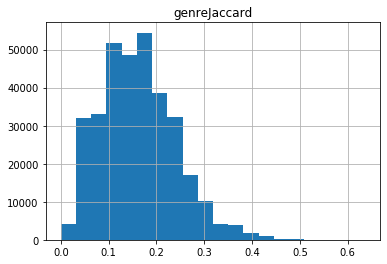

In [22]:
hist = recommendation_tag_genre_time.hist(bins=20)

In [80]:
from surprise import SVD
from surprise import KNNBaseline
from surprise.model_selection import train_test_split
from surprise.model_selection import LeaveOneOut
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict

In [81]:
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
df = pd.merge(movies, ratings, on='movieId', how='inner')
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
trainSet, testSet = train_test_split(data, test_size=.25, random_state=0)
algo = SVD(random_state=0)
algo.fit(trainSet)
predictions = algo.test(testSet)

def RMSE(predictions):
        return accuracy.rmse(predictions, verbose=False)
    
print("RMSE: ", RMSE(predictions))

RMSE:  0.8721506370755425


In [82]:
def GetTopN(predictions, n=10, minimumRating=4.0):
    topN = defaultdict(list)
    for userID, movieID, actualRating, estimatedRating, _ in predictions:
        if (estimatedRating >= minimumRating):
            topN[int(userID)].append((int(movieID), estimatedRating))

    for userID, ratings in topN.items():
        ratings.sort(key=lambda x: x[1], reverse=True)
        topN[int(userID)] = ratings[:n]

    return topN

In [83]:
LOOCV = LeaveOneOut(n_splits=1, random_state=1)

for trainSet, testSet in LOOCV.split(data):
    algo.fit(trainSet)
    leftOutPredictions = algo.test(testSet)
    bigTestSet = trainSet.build_anti_testset()
    allPredictions = algo.test(bigTestSet)
    topNPredicted = GetTopN(allPredictions, n=10)

In [108]:
movies = pd.read_csv('ml-latest-small/movies.csv')
recommendation_avg_ratings = pd.DataFrame(columns=['userId','recommendedMovie','rating'])

for user, movies_list in topNPredicted.items():
    
    for movie in movies_list:
        movie_name = getMovieNameForMovieId(movie[0], movies)
        
        genre_dataframe = {'userId': user, 'recommendedMovie' : movie_name, 'rating' : movie[1]}
        recommendation_avg_ratings = recommendation_avg_ratings.append(genre_dataframe, ignore_index=True)
        

In [110]:
recommendation_avg_ratings.to_csv('recommendation_avg.csv')